<a href="https://colab.research.google.com/github/zahra370/DL_assignments/blob/main/FINAL_PROJ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 8.9 MB/s 


In [ ]:
 pip install dicom2nifti 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 13.0 MB 10.7 MB/s 


In [ ]:
import os
import keras
import zipfile

# Download url of normal CT scans.
url = "https://github.com/hasibzunair/3D-image-classification-tutorial/releases/download/v0.2/CT-0.zip"
filename = os.path.join(os.getcwd(), "CT-0.zip")
keras.utils.get_file(filename, url)

# Make a directory to store the data.
os.makedirs("MosMedData")

# Unzip data in the newly created directory.
with zipfile.ZipFile("CT-0.zip", "r") as z_fp:
    z_fp.extractall("./MosMedData/")

1065471431/1065471431 [==============================] - 148s 0us/step


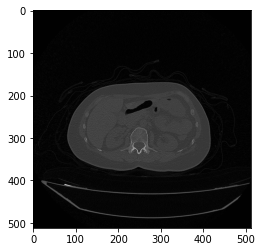

In [ ]:
import pydicom as dicom
import matplotlib.pylab as plt

# specify your image path
image_path = '/content/drive/MyDrive/Subject (1000)/61893738'
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array, cmap = 'gray')

In [ ]:
import dicom2nifti
path_to_dicom_series = '/content/drive/MyDrive/Subject (1000)'
path_to_save_nifti_file = '/content/drive/MyDrive/sub100_nifti'

dicom2nifti.convert_directory(path_to_dicom_series, path_to_save_nifti_file,'pt1.nii.gz')

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/dicom2nifti/convert_dir.py", line 85, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.8/dist-packages/dicom2nifti/convert_dicom.py", line 117, in dicom_array_to_nifti
    results = convert_generic.dicom_to_nifti(dicom_list, output_file)
  File "/usr/local/lib/python3.8/dist-packages/dicom2nifti/convert_generic.py", line 103, in dicom_to_nifti
    if common.is_multiframe_dicom(dicom_input):
  File "/usr/local/lib/python3.8/dist-packages/dicom2nifti/common.py", line 148, in is_multiframe_dicom
    header = dicom_input[0]
IndexError: list index out of range


(512, 512, 219)


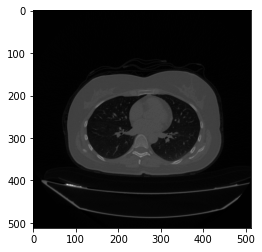

In [ ]:
# visulize NIFTI dataset
import matplotlib.pyplot as plt
import nibabel as nib
import scipy.ndimage as ndi

ct = nib.load('/content/drive/MyDrive/sub100_nifti/4_mediastinum.nii.gz').get_fdata()
print(ct.shape)

test = ct[:,:,116]
plt.imshow(ndi.rotate(test, 90), cmap = 'gray')
plt.show()

binary image


Text(0.5, 1.0, 'binary')

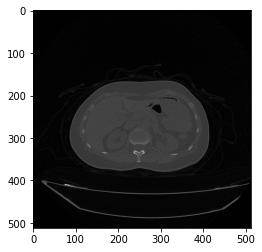

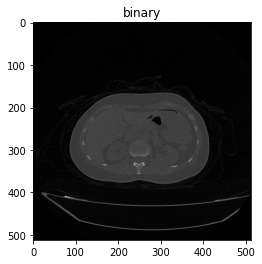

In [ ]:
import pydicom as dicom
# lung segmentations
path = '/content/drive/MyDrive/Subject (1000)/61893734'
ds = dicom.dcmread(path)
ct = ds.pixel_array
ct[ct == -2000] = 0
plt.figure()
plt.imshow(ct,cmap='gray')
# plt.imshow(ndi.rotate(ct[:,:,100],90), cmap=plt.cm.gray)
binary_image = ct <= -320 
print('binary image')
plt.figure()
plt.imshow(ct,cmap='gray')
# plt.imshow(ndi.rotate(ct[:,:,100],90), cmap=plt.cm.gray)
plt.title('binary')

In [ ]:
# #######################
# keras dataset

import os
import zipfile
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# Download url of normal CT scans.
url = "https://github.com/hasibzunair/3D-image-classification-tutorial/releases/download/v0.2/CT-0.zip"
filename = os.path.join(os.getcwd(), "CT-0.zip")
keras.utils.get_file(filename, url)

# Download url of abnormal CT scans.
url = "https://github.com/hasibzunair/3D-image-classification-tutorial/releases/download/v0.2/CT-23.zip"
filename = os.path.join(os.getcwd(), "CT-23.zip")
keras.utils.get_file(filename, url)

# Make a directory to store the data.
os.makedirs("MosMedData")

# Unzip data in the newly created directory.
with zipfile.ZipFile("CT-0.zip", "r") as z_fp:
    z_fp.extractall("./MosMedData/")

with zipfile.ZipFile("CT-23.zip", "r") as z_fp:
    z_fp.extractall("./MosMedData/")

1045162547/1045162547 [==============================] - 7s 0us/step


In [ ]:
import nibabel as nib

from scipy import ndimage


def read_nifti_file(filepath):
    """Read and load volume"""
    # Read file
    scan = nib.load(filepath)
    # Get raw data
    scan = scan.get_fdata()
    return scan


def normalize(volume):
    """Normalize the volume"""
    min = -1000
    max = 400
    volume[volume < min] = min
    volume[volume > max] = max
    volume = (volume - min) / (max - min)
    volume = volume.astype("float32")
    return volume


def resize_volume(img):
    """Resize across z-axis"""
    # Set the desired depth
    desired_depth = 64
    desired_width = 128
    desired_height = 128
    # Get current depth
    current_depth = img.shape[-1]
    current_width = img.shape[0]
    current_height = img.shape[1]
    # Compute depth factor
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
    # Rotate
    img = ndimage.rotate(img, 90, reshape=False)
    # Resize across z-axis
    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1)
    return img


def process_scan(path):
    """Read and resize volume"""
    # Read scan
    volume = read_nifti_file(path)
    # Normalize
    volume = normalize(volume)
    # Resize width, height and depth
    volume = resize_volume(volume)
    return volume


In [ ]:
# Folder "CT-0" consist of CT scans having normal lung tissue,
# no CT-signs of viral pneumonia.
normal_scan_paths = [
    os.path.join(os.getcwd(), "MosMedData/CT-0", x)
    for x in os.listdir("MosMedData/CT-0")
]
# Folder "CT-23" consist of CT scans having several ground-glass opacifications,
# involvement of lung parenchyma.
abnormal_scan_paths = [
    os.path.join(os.getcwd(), "MosMedData/CT-23", x)
    for x in os.listdir("MosMedData/CT-23")
]

print("CT scans with normal lung tissue: " + str(len(normal_scan_paths)))
print("CT scans with abnormal lung tissue: " + str(len(abnormal_scan_paths)))

CT scans with normal lung tissue: 100
CT scans with abnormal lung tissue: 100


In [ ]:
# Read and process the scans.
# Each scan is resized across height, width, and depth and rescaled.
abnormal_scans = np.array([process_scan(path) for path in abnormal_scan_paths])
normal_scans = np.array([process_scan(path) for path in normal_scan_paths])

# For the CT scans having presence of viral pneumonia
# assign 1, for the normal ones assign 0.
abnormal_labels = np.array([1 for _ in range(len(abnormal_scans))])
normal_labels = np.array([0 for _ in range(len(normal_scans))])

# Split data in the ratio 70-30 for training and validation.
x_train = np.concatenate((abnormal_scans[:70], normal_scans[:70]), axis=0)
y_train = np.concatenate((abnormal_labels[:70], normal_labels[:70]), axis=0)
x_val = np.concatenate((abnormal_scans[70:], normal_scans[70:]), axis=0)
y_val = np.concatenate((abnormal_labels[70:], normal_labels[70:]), axis=0)
print(
    "Number of samples in train and validation are %d and %d."
    % (x_train.shape[0], x_val.shape[0])
)

Number of samples in train and validation are 140 and 60.


In [ ]:
import random

from scipy import ndimage


@tf.function
def rotate(volume):
    """Rotate the volume by a few degrees"""

    def scipy_rotate(volume):
        # define some rotation angles
        angles = [-20, -10, -5, 5, 10, 20]
        # pick angles at random
        angle = random.choice(angles)
        # rotate volume
        volume = ndimage.rotate(volume, angle, reshape=False)
        volume[volume < 0] = 0
        volume[volume > 1] = 1
        return volume

    augmented_volume = tf.numpy_function(scipy_rotate, [volume], tf.float32)
    return augmented_volume


def train_preprocessing(volume, label):
    """Process training data by rotating and adding a channel."""
    # Rotate volume
    volume = rotate(volume)
    volume = tf.expand_dims(volume, axis=3)
    return volume, label


def validation_preprocessing(volume, label):
    """Process validation data by only adding a channel."""
    volume = tf.expand_dims(volume, axis=3)
    return volume, label

In [ ]:
# Define data loaders.
train_loader = tf.data.Dataset.from_tensor_slices((x_train, y_train))
validation_loader = tf.data.Dataset.from_tensor_slices((x_val, y_val))

batch_size = 2
# Augment the on the fly during training.
train_dataset = (
    train_loader.shuffle(len(x_train))
    .map(train_preprocessing)
    .batch(batch_size)
    .prefetch(2)
)
# Only rescale.
validation_dataset = (
    validation_loader.shuffle(len(x_val))
    .map(validation_preprocessing)
    .batch(batch_size)
    .prefetch(2)
)

Dimension of the CT scan is: (128, 128, 64, 1)


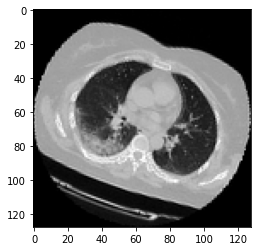

In [ ]:
import matplotlib.pyplot as plt

data = train_dataset.take(1)
images, labels = list(data)[0]
images = images.numpy()
image = images[0]
print("Dimension of the CT scan is:", image.shape)
plt.imshow(np.squeeze(image[:, :, 30]), cmap="gray")

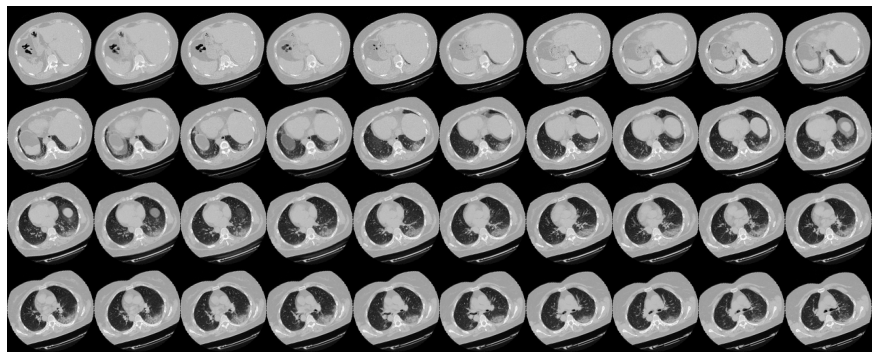

In [ ]:
def plot_slices(num_rows, num_columns, width, height, data):
    """Plot a montage of 20 CT slices"""
    data = np.rot90(np.array(data))
    data = np.transpose(data)
    data = np.reshape(data, (num_rows, num_columns, width, height))
    rows_data, columns_data = data.shape[0], data.shape[1]
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]
    fig_width = 12.0
    fig_height = fig_width * sum(heights) / sum(widths)
    f, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={"height_ratios": heights},
    )
    for i in range(rows_data):
        for j in range(columns_data):
            axarr[i, j].imshow(data[i][j], cmap="gray")
            axarr[i, j].axis("off")
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()


# Visualize montage of slices.
# 4 rows and 10 columns for 100 slices of the CT scan.
plot_slices(4, 10, 128, 128, image[:, :, :40])

In [ ]:
import os
import zipfile
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

** SIX LAYER NEURAL NETWORK **


***CONV layer 1***

layer = 1 , Filters = 64 ,filter_size= 3, S = 2 , P = same , activation = Relu 

***Maxpooling*** 

filter = 2, S = 1

***Batch Normalization***

***CONV layer 2***

layer = 2 , Filters = 64 ,filter_size= 3, S = 2 , P = same , activation = Relu 


***Maxpooling*** 

filter = 2, S = 1

***Batch Normalization***

***CONV layer 3***

layer = 1 , Filters = 128 filter_size= 9 S = 2 , P = same , activation = Relu 


***Maxpooling*** 

filter = 2, S = 1

***Batch Normalization***

***CONV layer 4***

layer = 1 , Filters = 256 filter_size= 5 S = 2 , P = same , activation = Relu 



*   List item
*   List item


***Maxpooling*** 

filter = 2, S = 1

***Batch Normalization***



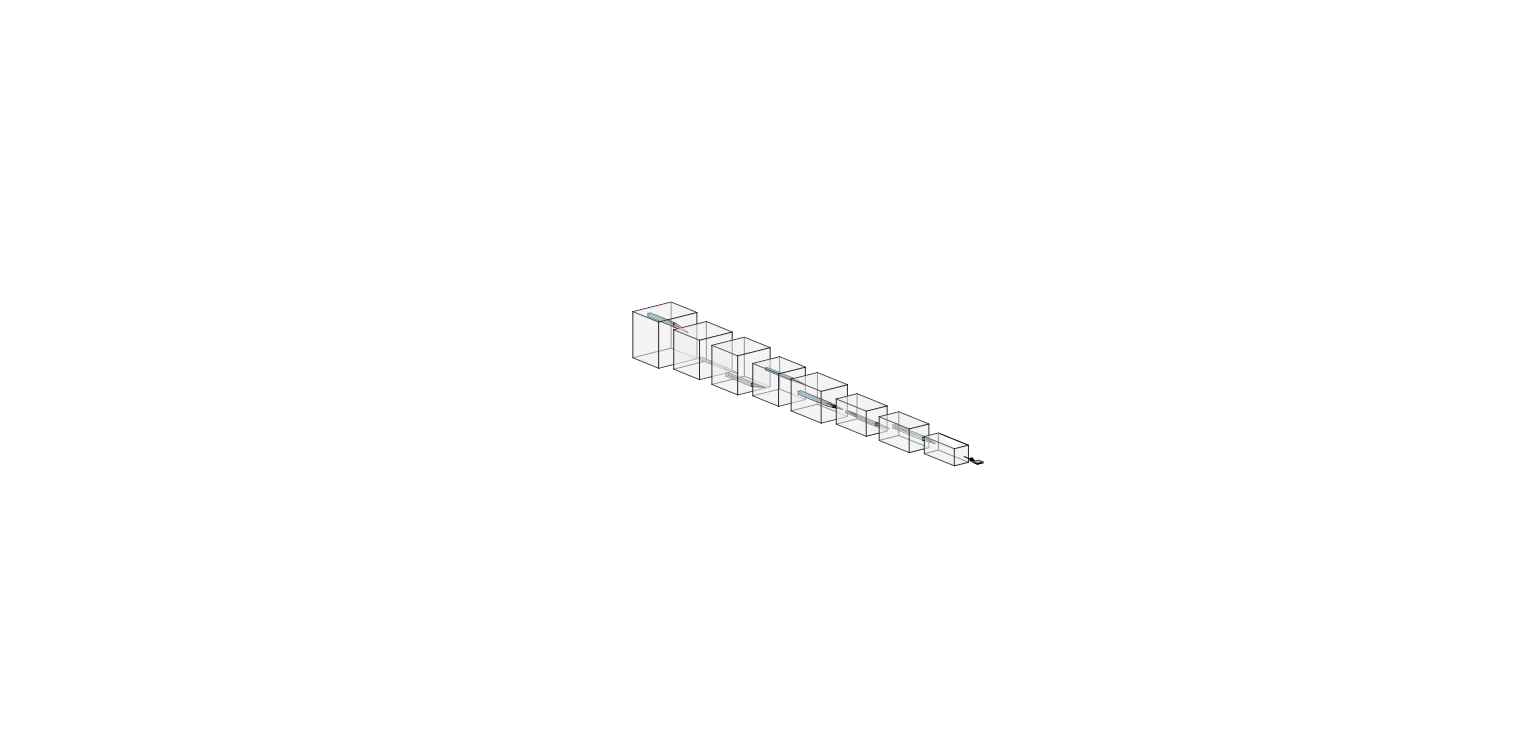

In [ ]:


def get_model(width=128, height=128, depth=64):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((width, height, depth, 1))

    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=128, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=256, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dense(units=512, activation="relu")(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(units=1, activation="sigmoid")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")
    return model


# Build model.
model = get_model(width=128, height=128, depth=64)
model.summary()




Model: "3dcnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 128, 128, 64, 1)  0         
                             ]                                   
                                                                 
 conv3d_45 (Conv3D)          (None, 126, 126, 62, 64)  1792      
                                                                 
 max_pooling3d_24 (MaxPoolin  (None, 63, 63, 31, 64)   0         
 g3D)                                                            
                                                                 
 batch_normalization_24 (Bat  (None, 63, 63, 31, 64)   256       
 chNormalization)                                                
                                                                 
 conv3d_46 (Conv3D)          (None, 61, 61, 29, 64)    110656    
                                                             

In [ ]:
# Compile model.
initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=["acc"],
)

# Define callbacks.
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "3d_image_classification.h5", save_best_only=True
)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_acc", patience=15)

# Train the model, doing validation at the end of each epoch
epochs = 100
model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    shuffle=True,
    verbose=2,
    callbacks=[checkpoint_cb, early_stopping_cb],
)

Epoch 1/100
70/70 - 26s - loss: 0.6862 - acc: 0.5429 - val_loss: 0.8590 - val_acc: 0.5000 - 26s/epoch - 377ms/step
Epoch 2/100
70/70 - 24s - loss: 0.6377 - acc: 0.6214 - val_loss: 1.9660 - val_acc: 0.5000 - 24s/epoch - 341ms/step
Epoch 3/100
70/70 - 24s - loss: 0.6341 - acc: 0.6357 - val_loss: 1.3634 - val_acc: 0.5000 - 24s/epoch - 339ms/step
Epoch 4/100
70/70 - 24s - loss: 0.6493 - acc: 0.6286 - val_loss: 1.5497 - val_acc: 0.5000 - 24s/epoch - 339ms/step
Epoch 5/100
70/70 - 24s - loss: 0.6470 - acc: 0.6143 - val_loss: 2.4554 - val_acc: 0.5000 - 24s/epoch - 342ms/step
Epoch 6/100
70/70 - 25s - loss: 0.6363 - acc: 0.6214 - val_loss: 1.8476 - val_acc: 0.5000 - 25s/epoch - 358ms/step
Epoch 7/100
70/70 - 24s - loss: 0.6094 - acc: 0.6786 - val_loss: 2.1960 - val_acc: 0.5000 - 24s/epoch - 343ms/step
Epoch 8/100
70/70 - 24s - loss: 0.6306 - acc: 0.6357 - val_loss: 1.6044 - val_acc: 0.5000 - 24s/epoch - 337ms/step
Epoch 9/100
70/70 - 24s - loss: 0.6056 - acc: 0.6429 - val_loss: 1.0183 - val_ac

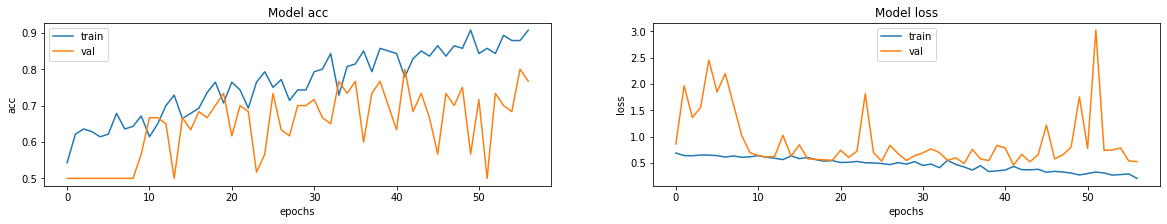

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(["acc", "loss"]):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [ ]:
# Load best weights.
model.load_weights("3d_image_classification.h5")
prediction = model.predict(np.expand_dims(x_val[0], axis=0))[0]
scores = [1 - prediction[0], prediction[0]]

class_names = ["normal", "abnormal"]
for score, name in zip(scores, class_names):
    print(
        "This model is %.2f percent confident that CT scan is %s"
        % ((100 * score), name)
    )

1/1 [==============================] - 0s 33ms/step
This model is 86.71 percent confident that CT scan is normal
This model is 13.29 percent confident that CT scan is abnormal


In [ ]:
covidpred = []
for i in range(0,30):
  Y_pred = model.predict(np.expand_dims(x_val[i], axis=0))[0]
  print(Y_pred)
  covidpred.append(Y_pred)

noncovidpred = []
for i in range(30,60):
  Y_pred = model.predict(np.expand_dims(x_val[i], axis=0))[0]
  print(Y_pred)
  noncovidpred.append(Y_pred)

1/1 [==============================] - 0s 36ms/step
[0.13285282]
1/1 [==============================] - 0s 28ms/step
[0.6549962]
1/1 [==============================] - 0s 33ms/step
[0.99330586]
1/1 [==============================] - 0s 27ms/step
[0.9644028]
1/1 [==============================] - 0s 73ms/step
[0.07468127]
1/1 [==============================] - 0s 31ms/step
[0.99748874]
1/1 [==============================] - 0s 19ms/step
[0.18963473]
1/1 [==============================] - 0s 18ms/step
[0.6199573]
1/1 [==============================] - 0s 18ms/step
[0.9655523]
1/1 [==============================] - 0s 21ms/step
[0.0990382]
1/1 [==============================] - 0s 18ms/step
[0.9415343]
1/1 [==============================] - 0s 19ms/step
[0.6834941]
1/1 [==============================] - 0s 17ms/step
[0.51508695]
1/1 [==============================] - 0s 23ms/step
[0.9810147]
1/1 [==============================] - 0s 22ms/step
[0.99346864]
1/1 [============================

In [ ]:
print(np.average(covidpred))
print(np.average(noncovidpred))
# print(max(pred))
# print(min(pred))

0.7210933
0.31691584


In [ ]:
print(max(noncovidpred))

[0.8100755]


In [ ]:
# print("No of elements :", len(pred))
y_pred1 = []
for i in (covidpred):
  if i >= 0.5:
    y_pred1.append(1)
  else :
    y_pred1.append(0)
print(len(y_pred1))
print(y_pred1)


y_pred2 = []
for i in (noncovidpred):
  if i >= 0.5:
    y_pred2.append(1)
  else :
    y_pred2.append(0)
print(len(y_pred2))
print(y_pred2)


30
[0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
30
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0]


In [ ]:
import numpy as np

y_predz = y_pred1+ y_pred2
print(len(y_pred))
print(y_pred)

60
[0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0]


In [ ]:



print("Classification Report: \n", classification_report(y_val, y_predz))

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.78      0.83      0.81        30

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



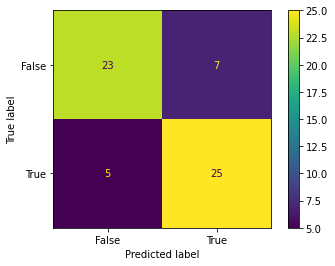

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_val, y_predz)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

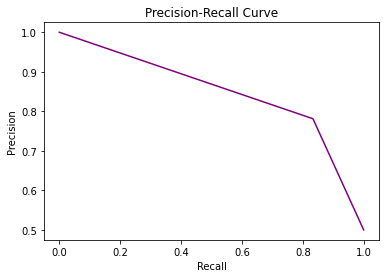

In [ ]:


from sklearn.metrics import precision_recall_curve

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_val, y_predz)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

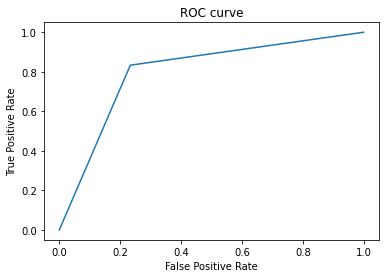

In [ ]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_val, y_predz)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve')
plt.show()

Dimension of the CT scan is: (128, 128, 64)


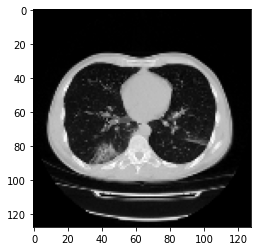

In [ ]:
import matplotlib.pyplot as plt

# data = train_dataset.take(1)
# images, labels = list(data)[0]
# images = images.numpy()
# image = images[0]
img = x_val[0]

print("Dimension of the CT scan is:", img.shape)
plt.imshow(np.squeeze(img[:, :, 30]), cmap="gray")

In [ ]:
import os
# Folder "CT-0" consist of CT scans having normal lung tissue,
# no CT-signs of viral pneumonia.
normal_scan_paths1 = [
    os.path.join(os.getcwd(), "/content/drive/MyDrive/NON_COVID", x)
    for x in os.listdir("/content/drive/MyDrive/NON_COVID")
]
# Folder "CT-23" consist of CT scans having several ground-glass opacifications,
# involvement of lung parenchyma.
abnormal_scan_paths1 = [
    os.path.join(os.getcwd(), "/content/drive/MyDrive/COVID", x)
    for x in os.listdir("/content/drive/MyDrive/COVID")
]

print("CT scans with normal lung tissue: " + str(len(normal_scan_paths1)))
print("CT scans with abnormal lung tissue: " + str(len(abnormal_scan_paths1)))

CT scans with normal lung tissue: 15
CT scans with abnormal lung tissue: 57


In [ ]:
# Read and process the scans.
# Each scan is resized across height, width, and depth and rescaled.
abnormal_scans1 = np.array([process_scan(path) for path in abnormal_scan_paths1])
normal_scans1 = np.array([process_scan(path) for path in normal_scan_paths1])

# For the CT scans having presence of viral pneumonia
# assign 1, for the normal ones assign 0.
abnormal_labels1 = np.array([1 for _ in range(len(abnormal_scans1))])
normal_labels1 = np.array([0 for _ in range(len(normal_scans1))])

# Split data in the ratio 70-30 for training and validation.
x_train1 = np.concatenate((abnormal_scans1[:38], normal_scans1[:10]), axis=0)
y_train1 = np.concatenate((abnormal_labels1[:38], normal_labels1[:10]), axis=0)
x_val1 = np.concatenate((abnormal_scans1[38:], normal_scans1[10:]), axis=0)
y_val1 = np.concatenate((abnormal_labels1[38:], normal_labels1[10:]), axis=0)
print(
    "Number of samples in train and validation are %d and %d."
    % (x_train1.shape[0], x_val1.shape[0])
)

Number of samples in train and validation are 48 and 24.


In [ ]:
# Load best weights.
model.load_weights("3d_image_classification.h5")
prediction = model.predict(np.expand_dims(x_val1[2], axis=0))[0]
scores = [1 - prediction[0], prediction[0]]

class_names = ["normal", "abnormal"]
for score, name in zip(scores, class_names):
    print(
        "This model is %.2f percent confident that CT scan is %s"
        % ((100 * score), name)
    )

1/1 [==============================] - 0s 24ms/step
This model is 0.00 percent confident that CT scan is normal
This model is 100.00 percent confident that CT scan is abnormal
